In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\manee\Downloads\archive (21)\Electric_Production.csv")

In [3]:
df.shape

(397, 2)

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [8]:
df.set_index('DATE', inplace = True)

In [9]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Text(0.5, 1.0, 'Plotting electric production')

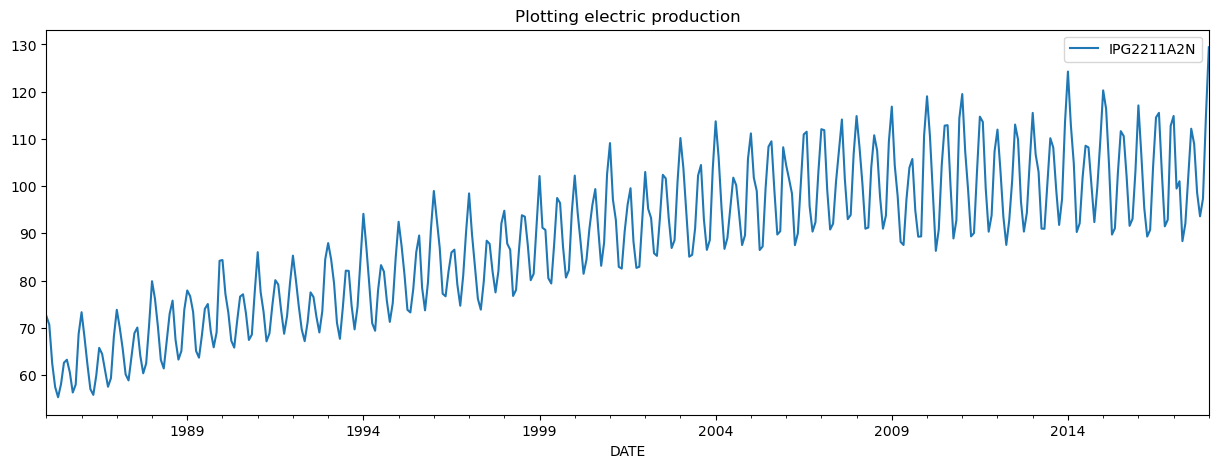

In [11]:
df.plot(figsize = (15,5))
plt.title('Plotting electric production')

In [12]:
from statsmodels.tsa.stattools import adfuller

In [16]:
print("Stationary" if adfuller(df['IPG2211A2N'])[1] < 0.05 else "Non-Stationary")

Non-Stationary


In [17]:
df['order_12'] = df['IPG2211A2N'] - df['IPG2211A2N'].shift(12)

In [18]:
df.head()

,IPG2211A2N,order_12
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN


In [21]:
print("Stationary" if adfuller(df['order_12'].dropna())[1] < 0.05 else "Non-Stationary")

Stationary


Text(0.5, 1.0, 'Plotting the stationary data')

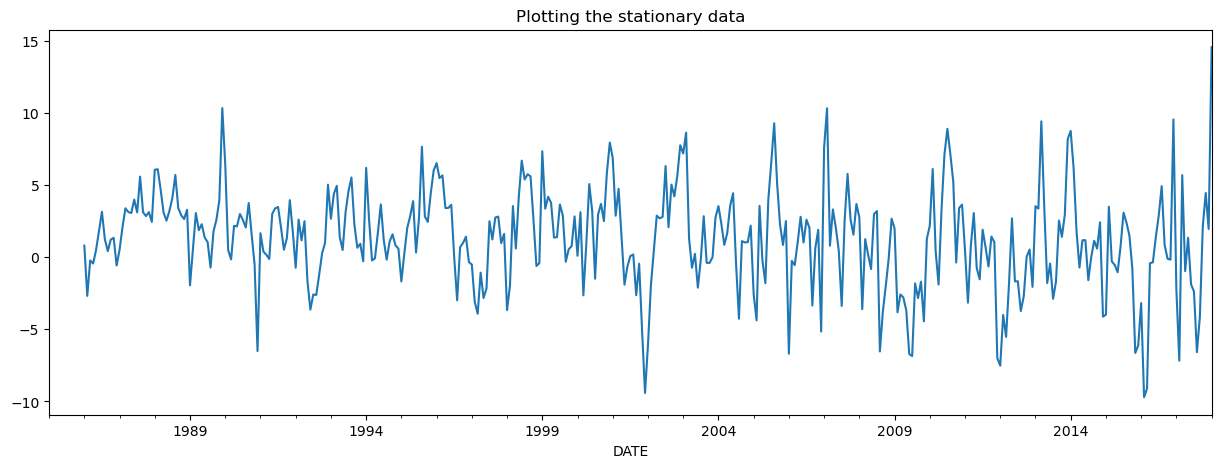

In [25]:
df["order_12"].plot(figsize = (15,5))
plt.title('Plotting the stationary data')

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

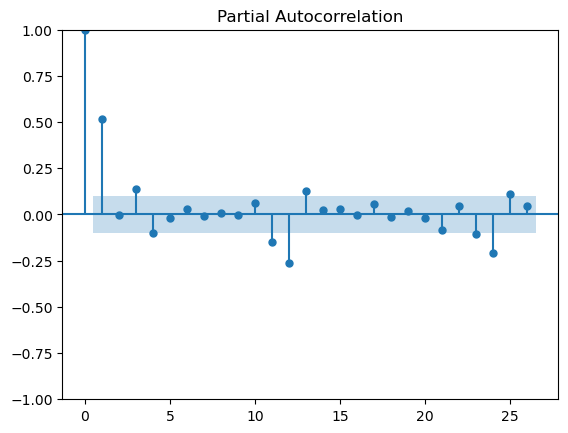

In [27]:
pacf = plot_pacf(df['order_12'].dropna())

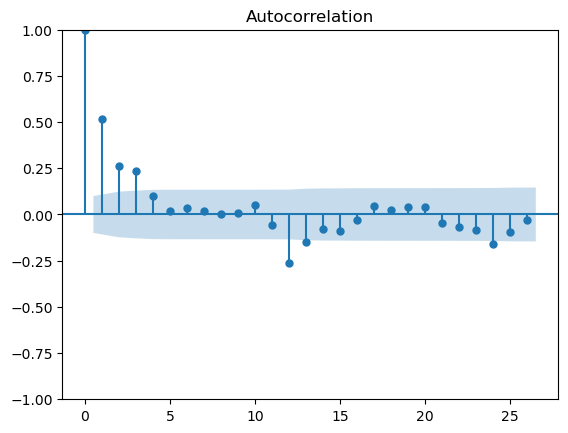

In [28]:
acf = plot_acf(df['order_12'].dropna())

In [29]:
train_df = df[:315]
test_df = df[315:]

In [30]:
from pmdarima import auto_arima

In [31]:
stepwise_fit = auto_arima(train_df['IPG2211A2N'], seasonal = True, m = 12)

C:\Users\manee\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\manee\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\manee\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\manee\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\manee\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\m

In [32]:
print(stepwise_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -670.152
Date:                              Thu, 06 Mar 2025   AIC                           1352.305
Time:                                      18:04:54   BIC                           1374.587
Sample:                                  01-01-1985   HQIC                          1361.219
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1186      0.069      1.727      0.084      -0.016       0.253
ar.L1          0.92

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
model = SARIMAX(train_df['IPG2211A2N'], order = stepwise_fit.order, seasonal_order = stepwise_fit.seasonal_order)

C:\Users\manee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
fitted_model = model.fit(disp = False)

In [37]:
print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           IPG2211A2N   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -673.350
Date:                              Thu, 06 Mar 2025   AIC                           1356.700
Time:                                      18:11:42   BIC                           1375.268
Sample:                                  01-01-1985   HQIC                          1364.129
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.003    345.444      0.000       0.992       1.004
ma.L1         -0.41

In [39]:
test_df.head()

,IPG2211A2N,order_12
DATE,,
2011-04-01,89.3583,3.0583
2011-05-01,90.0698,-0.7666
2011-06-01,102.8204,-1.5334
2011-07-01,114.7068,1.9002
2011-08-01,113.5958,0.6944


In [40]:
pred = fitted_model.predict(start = test_df.index[0], end = test_df.index[-1])

In [41]:
pred

2011-04-01     90.159341
2011-05-01     92.056603
2011-06-01    102.981229
2011-07-01    110.711952
2011-08-01    111.491757
                 ...    
2017-09-01    104.232210
2017-10-01     96.293279
2017-11-01     98.374746
2017-12-01    115.973668
2018-01-01    122.579013
Freq: MS, Name: predicted_mean, Length: 82, dtype: float64

In [42]:
test_df['Sarimax_pred'] = pred

C:\Users\manee\AppData\Local\Temp\ipykernel_9840\1355492190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sarimax_pred'] = pred


In [43]:
test_df

,IPG2211A2N,order_12,Sarimax_pred
DATE,,,
2011-04-01,89.3583,3.0583,90.159341
2011-05-01,90.0698,-0.7666,92.056603
2011-06-01,102.8204,-1.5334,102.981229
2011-07-01,114.7068,1.9002,110.711952
2011-08-01,113.5958,0.6944,111.491757
...,...,...,...
2017-09-01,98.6154,-4.1483,104.232210
2017-10-01,93.6137,2.1270,96.293279
2017-11-01,97.3359,4.4459,98.374746


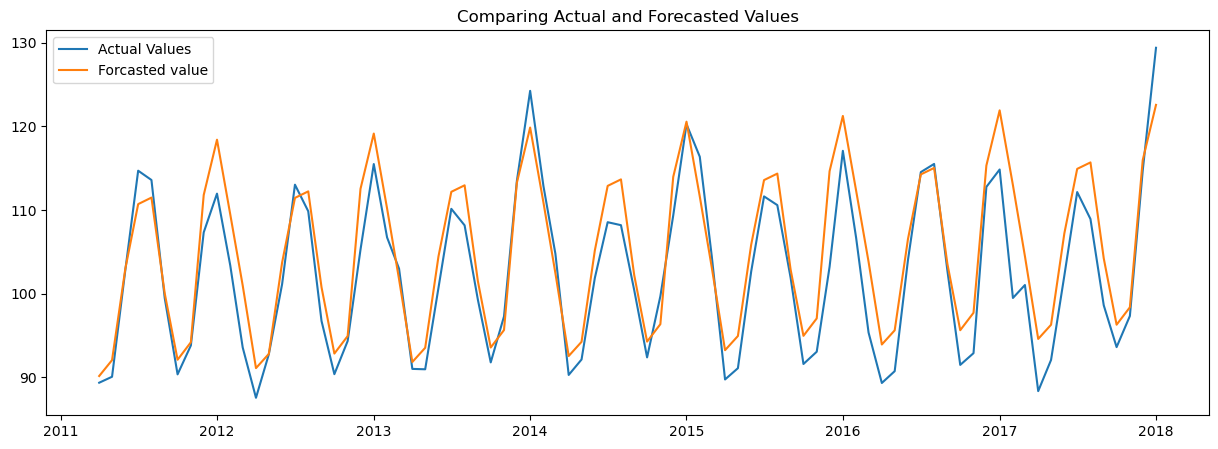

In [48]:
plt.figure(figsize = (15,5))
plt.plot(test_df.index, test_df['IPG2211A2N'], label = 'Actual Values')
plt.plot(test_df.index, test_df['Sarimax_pred'], label = 'Forcasted value')
plt.title('Comparing Actual and Forecasted Values')
plt.legend()